In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [228]:
data=pd.read_csv("Mall_Customers.csv")

In [229]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [231]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [232]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [233]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender
Numerical Features : CustomerID Age Annual Income (k$) Spending Score (1-100)


In [234]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [235]:
data=data.drop('CustomerID', axis=1)

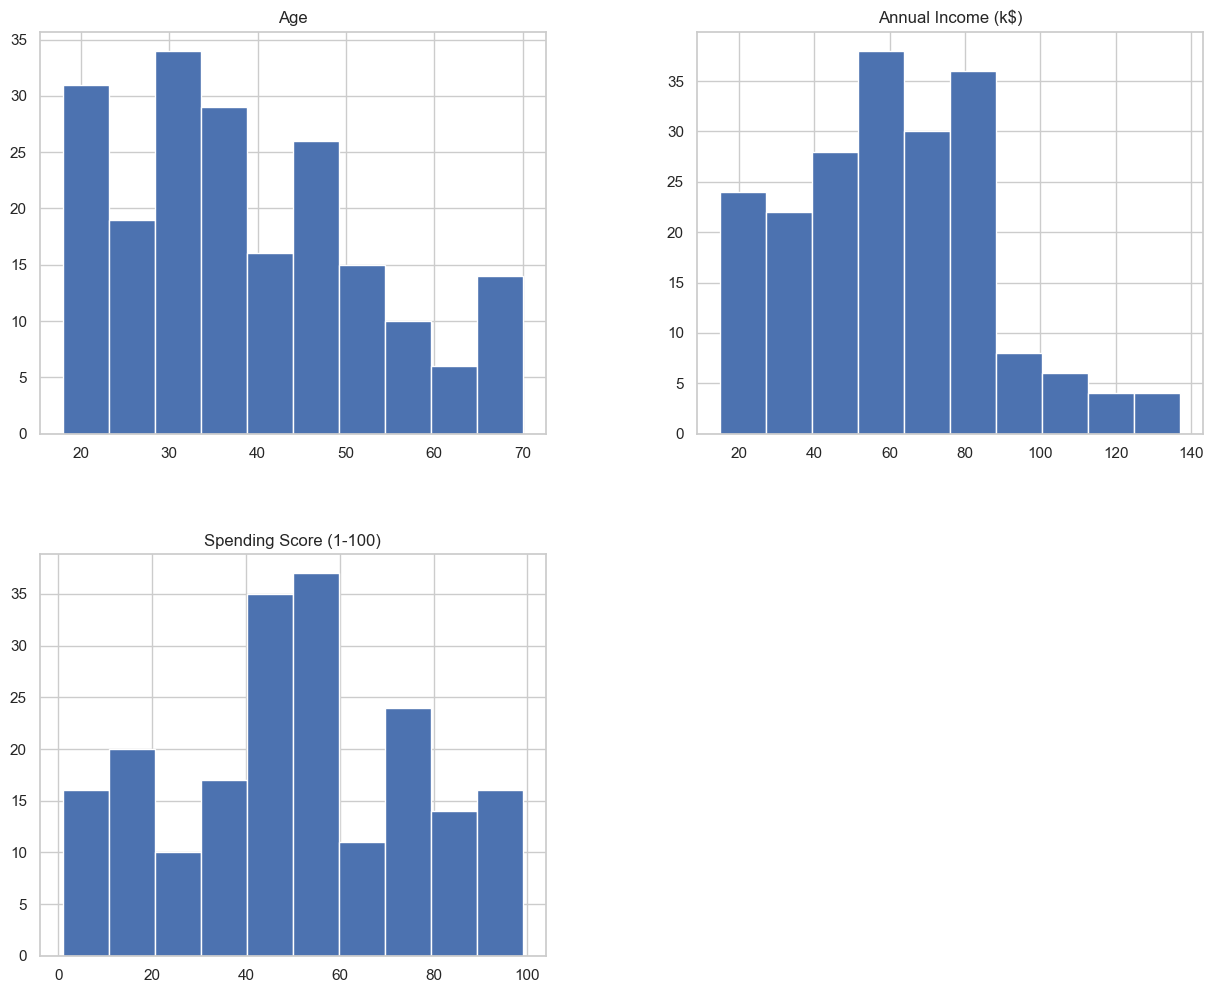

In [247]:
columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[columns_to_plot].hist(figsize=(15, 12))
plt.show()

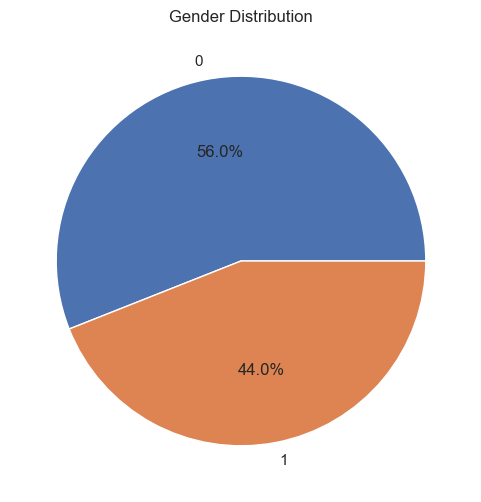

In [248]:
gender_counts = data['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [250]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.shape

(200, 2)

c:\Users\mc\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mc\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mc\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mc\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

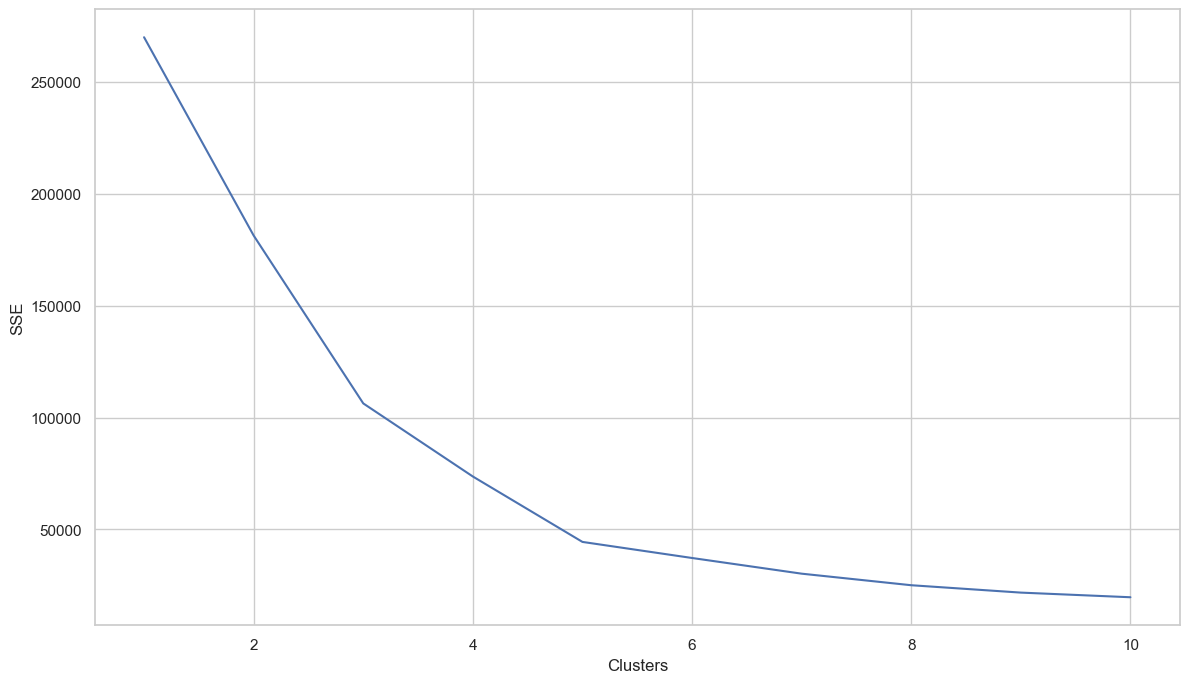

In [251]:
Inter = []
for i in range(1,11):
  model = KMeans(n_clusters = i)
  model.fit(X)
  Inter.append(model.inertia_)

# plotting the Elbow
plt.figure(figsize = (14, 8))
plt.plot(np.arange(1,11), Inter)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [252]:
K_model = KMeans(n_clusters = 5)
K_model.fit(X)

c:\Users\mc\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mc\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [255]:
clusters = K_model.labels_
X = X.assign(cluster = clusters)
X.head(10)

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
5,17,76,4
6,18,6,0
7,18,94,4
8,19,3,0
9,19,72,4


C:\Users\mc\AppData\Local\Temp\ipykernel_22476\5207252.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],


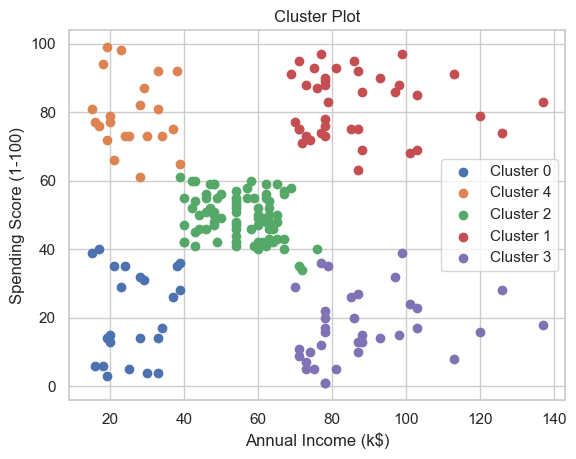

In [267]:
import matplotlib.pyplot as plt

# Assuming you have already trained a KMeans model and stored the labels in 'K_model.labels_'
clusters = K_model.labels_

# Assign clusters as a new column in the DataFrame
X['cluster'] = clusters

# Get unique clusters
unique_clusters = X['cluster'].unique()

# Plotting the clusters and setting the legend
for cluster in unique_clusters:
    cluster_data = X[X['cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                cmap='viridis', label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Plot')
plt.legend()
plt.show()


C:\Users\mc\AppData\Local\Temp\ipykernel_22476\2829094600.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],


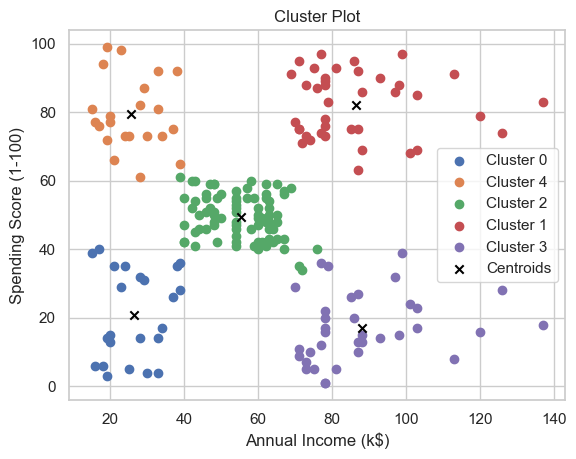

In [271]:
import matplotlib.pyplot as plt

# Assuming you have already trained a KMeans model and stored the labels in 'K_model.labels_'
clusters = K_model.labels_

# Assign clusters as a new column in the DataFrame
X['cluster'] = clusters

# Get unique clusters
unique_clusters = X['cluster'].unique()

# Plotting the clusters and setting the legend
for cluster in unique_clusters:
    cluster_data = X[X['cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                cmap='viridis', label=f'Cluster {cluster}')

# Retrieve the centroids from the trained KMeans model
centroids = K_model.cluster_centers_

# Plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='Black', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Plot')
plt.legend()
plt.show()


In [273]:
X['cluster'].value_counts()

2    81
1    39
3    35
0    23
4    22
Name: cluster, dtype: int64

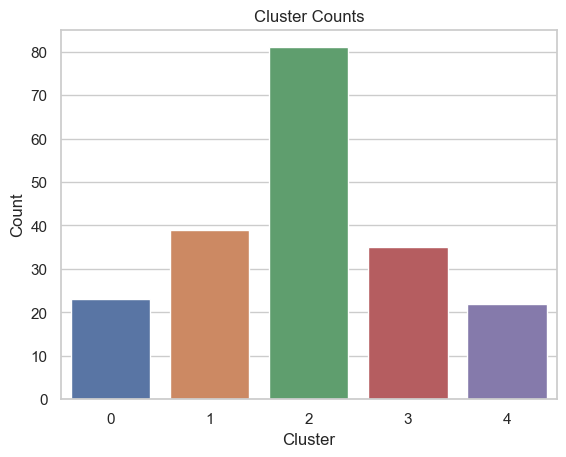

In [274]:
cluster_counts = X['cluster'].value_counts()

# Plotting the cluster counts as a bar plot using Seaborn
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()